In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv", encoding="latin-1")

In [3]:
df.shape

(7613, 5)

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df = df.drop(columns=["id", "keyword", "location"])

In [6]:
df.isna().sum()

text      0
target    0
dtype: int64

In [7]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


<AxesSubplot:xlabel='target', ylabel='count'>

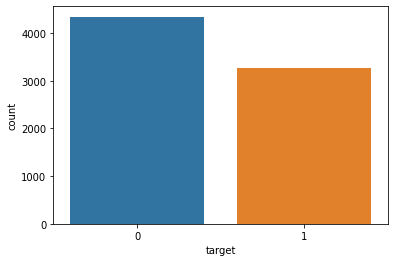

In [8]:
sns.countplot(data=df, x="target")

In [9]:
df.head(20)["text"]

0     Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     13,000 people receive #wildfires evacuation or...
4     Just got sent this photo from Ruby #Alaska as ...
5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
15                                       What's up man?
16                                        I love fruits
17                                     Summer is

In [10]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

In [11]:
snowball = SnowballStemmer(language="english")
stop_words = stopwords.words("english")
punctuation = string.punctuation
digits = string.digits
contraction_dict = {"ain't", "are not", "'s", "is", "aren't", "are not"}

def tokenize_sentence(sentence):
    sentence = re.sub(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", 
                                  "", sentence)
    
    for contr in contraction_dict:
        sentence = re.sub(contr, "", sentence)
    
    sentence = [i for i in sentence if i not in punctuation]
    sentence = str.join("", sentence)
    
    sentence = [i for i in sentence if i not in digits]
    sentence = str.join("", sentence)
    
    tokens = word_tokenize(sentence, language="english")
    tokens = [i for i in tokens if i not in stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    
    return tokens

In [12]:
example_sentence = df.iloc[np.random.randint(0, len(df))]["text"]

In [13]:
example_sentence

"'Up' House Saved From Demolition - http://t.co/4CPNBBZkzg Will be moved to Orcas Island Washington."

In [14]:
tokenize_sentence(example_sentence)

['up',
 'hous',
 'save',
 'from',
 'demolit',
 'will',
 'move',
 'orca',
 'island',
 'washington']

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [16]:
x, y = df["text"], df["target"]

In [17]:
pipe = Pipeline([("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x))),
                 ("model", RandomForestClassifier(n_estimators=300))])

In [18]:
model = pipe.fit(x, y)

In [19]:
test_df = pd.read_csv("test.csv")

In [20]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [21]:
test_df = test_df.drop(columns=["keyword", "location"])

In [22]:
test_df.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [23]:
predictions = model.predict(test_df["text"])

In [24]:
predictions

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [25]:
submission = pd.DataFrame({"id": test_df["id"], "target": predictions})

In [26]:
submission.columns

Index(['id', 'target'], dtype='object')

In [27]:
submission.to_csv("submissions.csv", index=False)

In [31]:
print(model.predict(["Hurricane was at the mountains of Almaty"]))

[1]
